In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [2]:
tf.__version__

'2.4.0'

# Load the Fashion MNIST dataset

In [3]:
# Load the Fashion-MNIST dataset
fashion_mnist_data = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist_data.load_data()

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
# Define the train labels
labels = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]

In [6]:
# Rescale the image values so that they lie in between 0 and 1.
train_images = train_images / 255.
test_images = test_images / 255.

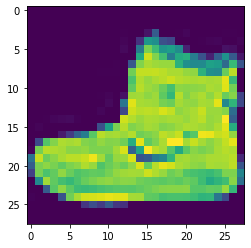

Label:  Ankle boot


In [7]:
# Display an image from the training dataset
i = 0  # which training sample
img = train_images[i, :, :]
plt.figure(1)
plt.imshow(img)
plt.show()
print("Label: ", labels[train_labels[i]])

# Using Feedforward layers

In [8]:
# Define a feedforward neural net
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Define the size of the input image
    Dense(64, activation="relu", name="h1"),
    Dense(32, activation="relu", name="h2"),
    Dense(16, activation="relu", name="h3"),
    Dense(16, activation="relu", name="h4"),
    Dense(10, activation="softmax", name="op")
])

In [9]:
# Display a summary of the model 
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
h1 (Dense)                   (None, 64)                50240     
_________________________________________________________________
h2 (Dense)                   (None, 32)                2080      
_________________________________________________________________
h3 (Dense)                   (None, 16)                528       
_________________________________________________________________
h4 (Dense)                   (None, 16)                272       
_________________________________________________________________
op (Dense)                   (None, 10)                170       
Total params: 53,290
Trainable params: 53,290
Non-trainable params: 0
____________________________________________________

In [10]:
# Define the optimizer
opt = tf.keras.optimizers.Adam(learning_rate=0.005)

# Compile the model
model.compile(optimizer=opt,
             loss="sparse_categorical_crossentropy",
             metrics=["accuracy"])

In [11]:
# Fit the feedforward model
history = model.fit(train_images, train_labels,
                    epochs=20, batch_size=32)

Epoch 1/20
1875/1875 [==============================] - 2s 717us/step - loss: 0.7222 - accuracy: 0.7424
Epoch 2/20
1875/1875 [==============================] - 1s 664us/step - loss: 0.4295 - accuracy: 0.8428
Epoch 3/20
1875/1875 [==============================] - 1s 621us/step - loss: 0.3869 - accuracy: 0.8597
Epoch 4/20
1875/1875 [==============================] - 1s 627us/step - loss: 0.3684 - accuracy: 0.8671
Epoch 5/20
1875/1875 [==============================] - 1s 632us/step - loss: 0.3549 - accuracy: 0.8741
Epoch 6/20
1875/1875 [==============================] - 1s 627us/step - loss: 0.3478 - accuracy: 0.8756
Epoch 7/20
1875/1875 [==============================] - 1s 655us/step - loss: 0.3383 - accuracy: 0.8791
Epoch 8/20
1875/1875 [==============================] - 1s 666us/step - loss: 0.3242 - accuracy: 0.8823
Epoch 9/20
1875/1875 [==============================] - 1s 642us/step - loss: 0.3251 - accuracy: 0.8830
Epoch 10/20
1875/1875 [==============================] - 1s 649u

In [12]:
# Convert the history attributes dictionary to a dataframe
history_df = pd.DataFrame(history.history)
history_df

,loss,accuracy
0,0.555421,0.800367
1,0.420044,0.847233
2,0.386727,0.860167
3,0.368435,0.868050
4,0.355618,0.872317
5,0.343593,0.876200
6,0.336033,0.879400
7,0.329296,0.881483
8,0.324430,0.883233
9,0.315902,0.886117


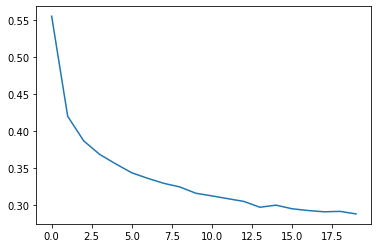

In [13]:
# Plot the loss
plt.figure(2)
plt.plot(history_df.loss)
plt.show()

In [14]:
# Test the performance of the feedforward model on the test dataset
_, acc_ff = model.evaluate(test_images[..., np.newaxis], test_labels)

313/313 [==============================] - 0s 502us/step - loss: 0.3919 - accuracy: 0.8663


# Using Convolutional layers

In [15]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [16]:
# Define the CNN model
model_cnn = Sequential([
    Conv2D(16, (3, 3), activation="relu", input_shape=(28, 28, 1)),
    MaxPooling2D((3, 3)),
    Flatten(),
    Dense(64, activation="relu"),
    Dense(64, activation="relu"),
    Dense(10, activation="softmax")
])

In [17]:
# Print model summary
model_cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 8, 8, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                65600     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 70,570
Trainable params: 70,570
Non-trainable params: 0
__________________________________________________

In [18]:
# Define the optimizer
opt = tf.keras.optimizers.Adam(learning_rate=0.005)

# Compile the model
model_cnn.compile(optimizer=opt,
             loss="sparse_categorical_crossentropy",
             metrics=["accuracy"])

In [19]:
# Fit the feedforward model
history_cnn = model_cnn.fit(train_images[..., np.newaxis], train_labels,
                            epochs=20, batch_size=32)

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5688 - accuracy: 0.7894
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3189 - accuracy: 0.8821
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2842 - accuracy: 0.8948
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2620 - accuracy: 0.9006
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2481 - accuracy: 0.9065
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2370 - accuracy: 0.9112
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2254 - accuracy: 0.9138
Epoch 8/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2178 - accuracy: 0.9198
Epoch 9/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2138 - accuracy: 0.9202
Epoch 10/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.202

In [20]:
# Convert the history attributes dictionary to a dataframe
history_df_cnn = pd.DataFrame(history_cnn.history)
history_df_cnn

,loss,accuracy
0,0.429235,0.842883
1,0.311262,0.884850
2,0.283626,0.895033
3,0.266355,0.900150
4,0.251942,0.905217
5,0.238544,0.911267
6,0.232456,0.912617
7,0.223223,0.917983
8,0.215330,0.919050
9,0.210471,0.920883


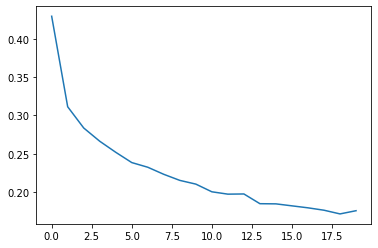

In [21]:
# Plot the loss
plt.figure(2)
plt.plot(history_cnn.history['loss'])
plt.show()

In [22]:
# Test the performance of the CNN model on the test dataset
_, acc_cnn = model_cnn.evaluate(test_images[..., np.newaxis], test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.3980 - accuracy: 0.8909


# Test performance of the feedforward model vs. CNN model

In [23]:
print("\nThe test accuracy of the feedforward model is: ", acc_ff)
print("The test accuracy of the CNN model is: ", acc_cnn)


The test accuracy of the feedforward model is:  0.8662999868392944
The test accuracy of the CNN model is:  0.8909000158309937
